## Labelling template Stardist

This is a labelling template for stardist problems.  Idea is that if we have a stardist model already, we can generate stardist result as starting point for relabelling/label correction. 

In [11]:
from skimage.io import imread
import numpy as np
from tnia.plotting.plt_helper import random_label_cmap
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
from stardist.models import StarDist2D, Config2D
from tnia.plotting.plt_helper import imshow_multi2d

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


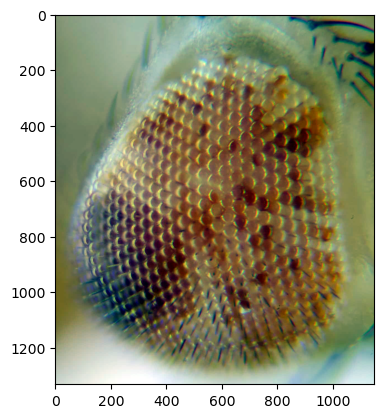

In [12]:
tnia_images_path = Path(r'D:\images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_01_18_drosophila_eye')
model_path = parent_path / 'model'
from csbdeep.utils import normalize

test_name='eye3.jpeg'
testim = imread(parent_path  / test_name) 
testim = normalize(testim,1,99.8, axis=(0,1))

testim_crop = testim[150:800,:]
testim_crop = normalize(testim_crop,1,99.8, axis=(0,1))
plt.imshow(testim)

In [13]:
testim.shape, testim.dtype, testim.max(), testim.min()

((1332, 1148, 3), dtype('float32'), 1.16, -0.96)

In [18]:
model_name = None
previous = None

if model_name is not None:
    model = StarDist2D(config=None, name="model_aug", basedir=model_path)
    labels, details = model.predict_instances(testim, prob_thresh=0.5, nms_thresh=0.1)
elif previous is not None:
    labels = imread(label_path / previous)
else:
    labels = np.zeros([testim.shape[0], testim.shape[1]], dtype = np.uint16)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


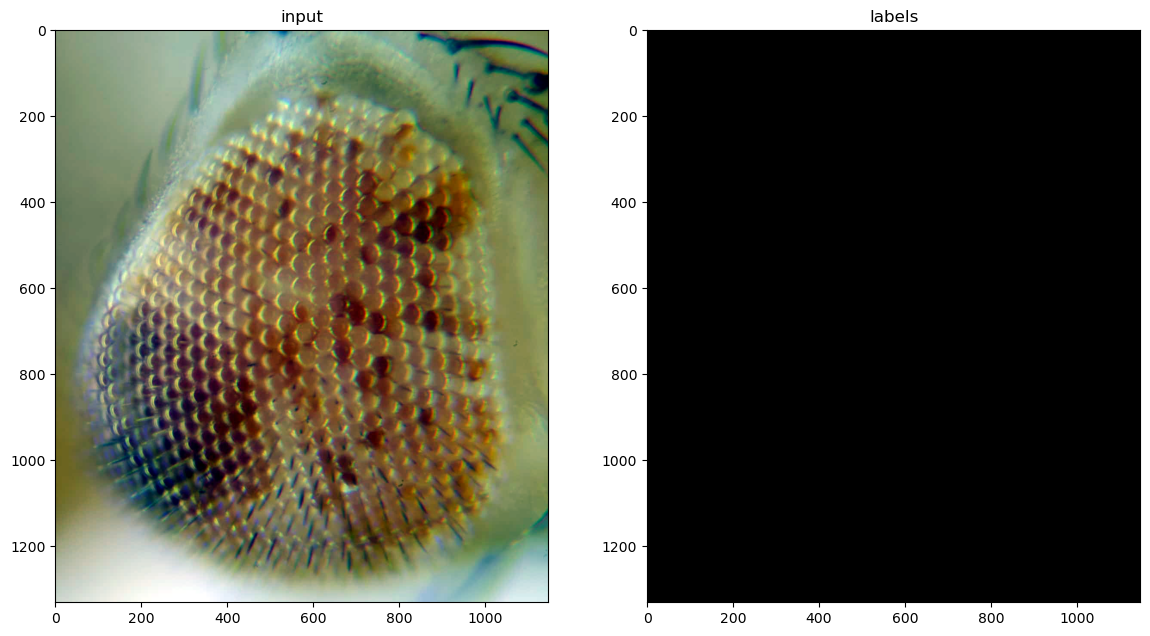

In [19]:
fig = imshow_multi2d([testim,labels],['input','labels'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])

In [20]:
import napari
viewer = napari.Viewer()
viewer.add_image(testim, name='testim')
viewer.add_labels(labels, name='predicted octohedrons')

<Labels layer 'predicted octohedrons' at 0x205025c5d90>

In [21]:
base_name = test_name.split('.')[0]
print(base_name)

eye3


In [25]:
from skimage.io import imsave
import os

labels_path = parent_path / 'labels'

if not os.path.exists(labels_path):
    os.makedirs(labels_path)

name = base_name + '-labels-corrected.tif'
imsave(labels_path / name , labels.astype('uint16'))

4270931344.py (10): D:\images\tnia-python-images\imagesc\2024_01_18_drosophila_eye\labels\eye3-labels-corrected.tif is a low contrast image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


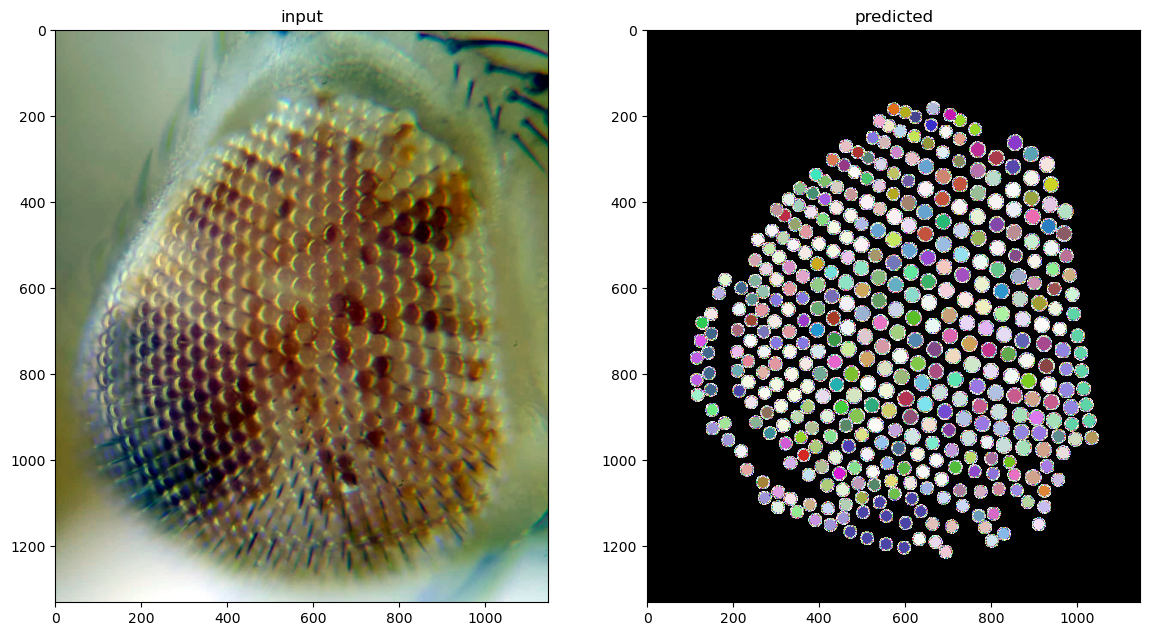

In [26]:
labels_test = imread( labels_path / name) 
fig = imshow_multi2d([testim,labels_test],['input','predicted'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])